In [2]:
import yfinance as yf
import pandas as pd

# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Display the first few rows
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Ticker            BND         SPY       TSLA
Date                                        
2015-01-02  62.573158  172.592850  14.620667
2015-01-05  62.754818  169.475906  14.006000
2015-01-06  62.936562  167.879562  14.085333
2015-01-07  62.974380  169.971619  14.063333
2015-01-08  62.875954  172.987747  14.041333


# Calculate Daily Returns 

In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Compute Annual Returns and Covariance Matrix

In [4]:
# Compute annual returns
annual_returns = returns.mean() * 252  # Assuming 252 trading days in a year

# Compute covariance matrix
cov_matrix = returns.cov() * 252  # Annualize the covariance

# Define Portfolio Weights and Calculate Portfolio Metrics

In [7]:
import numpy as np

# Initial weights
weights = np.array([0.4, 0.3, 0.3])  # TSLA, BND, SPY

# Calculate portfolio return and volatility
portfolio_return = np.sum(weights * annual_returns)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Optimize the Portfolio Using Sharpe Ratio

In [8]:
from scipy.optimize import minimize

# Risk-free rate (e.g., 10-year treasury rate)
risk_free_rate = 0.01

# Define the Sharpe ratio function
def negative_sharpe(weights):
    portfolio_return = np.sum(weights * annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_volatility

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # weights must sum to 1
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Initial guess
initial_weights = [1.0 / len(tickers)] * len(tickers)

# Optimize
optimal = minimize(negative_sharpe, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = optimal.x

# Analyze Portfolio Risk and Return

In [9]:
# Calculate optimal portfolio metrics
optimal_return = np.sum(optimal_weights * annual_returns)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
sharpe_ratio = (optimal_return - risk_free_rate) / optimal_volatility

# Measure Value at Risk (VaR)

In [10]:
# Calculate VaR at 95% confidence level
portfolio_returns = np.dot(returns, optimal_weights)
VaR_95 = np.percentile(portfolio_returns, 5)

# Visualization

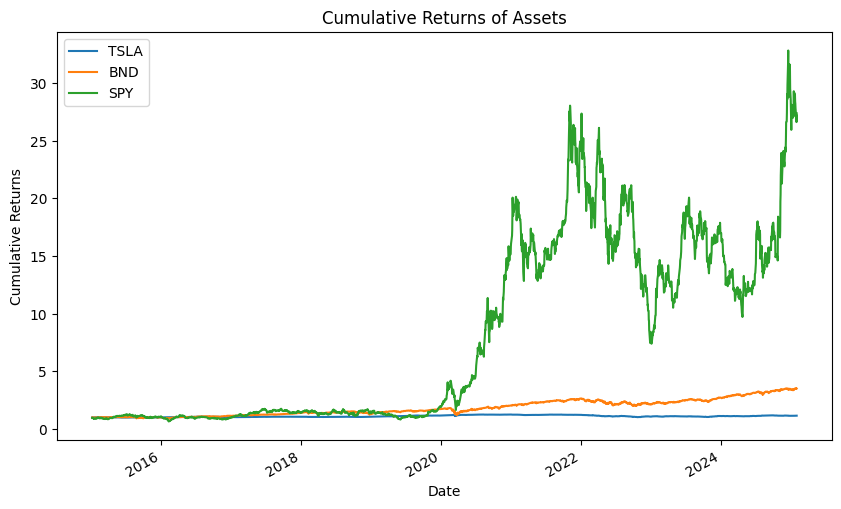

In [11]:
import matplotlib.pyplot as plt

# Cumulative returns
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns of Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(tickers)
plt.show()